In [ ]:
import numpy as np

# Ma trận ảnh xám 3x3 tự tạo
A = np.array([[25, 50, 50],
              [20, 40, 49],
              [22, 36, 36]])

# Tính gradient tại điểm trung tâm (1,1)

Gx = (A[1,2]) - (A[1,0])
Gy = (A[2,1]) - (A[0,1])

print("Ma trận A:")
print(A)
print("Gradient theo trục x tại điểm trung tâm:", Gx)
print("Gradient theo trục y tại điểm trung tâm:", Gy)
print("Độ lớn gradient trung tâm:", np.sqrt(Gx**2 + Gy**2))



Ma trận A:
[[25 50 50]
 [20 40 49]
 [22 36 36]]
Gradient theo trục x tại điểm trung tâm: 29
Gradient theo trục y tại điểm trung tâm: -14
Độ lớn gradient trung tâm: 32.202484376209235


In [ ]:
import numpy as np

B = np.array([[125,130,150],
              [200,190,167],
              [222,156,236]])

Gx = (B[1,2]) - (B[1,0])
Gy = (B[2,1]) - (B[0,1])

print("Ma trận B:")
print(B)
print("Gradient theo trục x tại điểm trung tâm:", Gx)
print("Gradient theo trục y tại điểm trung tâm:", Gy)
print("Độ lớn gradient trung tâm:", np.sqrt(Gx**2 + Gy**2))

Ma trận B:
[[125 130 150]
 [200 190 167]
 [222 156 236]]
Gradient theo trục x tại điểm trung tâm: -33
Gradient theo trục y tại điểm trung tâm: 26
Độ lớn gradient trung tâm: 42.01190307520001


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Đọc dữ liệu gốc
df = pd.read_csv('Iris.csv')  # File gốc

# 2. Chuẩn hóa các cột đặc trưng (bỏ 'Id' và 'Species')
features = df.drop(columns=['Id', 'Species'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Tạo DataFrame mới chứa dữ liệu chuẩn hóa
normalized_df = pd.DataFrame(features_scaled, columns=features.columns)
normalized_df['Species'] = df['Species']  # Thêm lại cột 'Species'
normalized_df.insert(0, 'Id', df['Id'])   # Thêm lại cột 'Id'

# 4. Lưu dữ liệu đã chuẩn hóa ra file
normalized_df.to_csv('iris_normalized.csv', index=False)

In [ ]:
test_indices = list(range(1, 10)) + list(range(50, 60)) + list(range(100, 110))
test_df = normalized_df.iloc[test_indices].reset_index(drop=True)
test_df.to_csv('iris_test.csv', index=False)

train_df = normalized_df.drop(test_indices).reset_index(drop=True)
train_df.to_csv('iris_train.csv', index=False)

print("Đã lưu tập train và test!")

Đã lưu tập train và test!


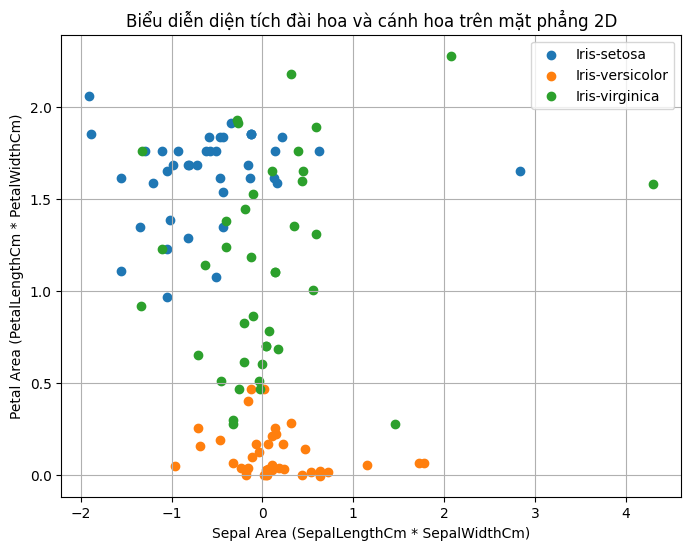

In [ ]:
# Biểu diễn đặc trưng 4D thành 2D bằng cách nhân dài*rộng đài hoa và dài*rộng cánh hoa (tạo diện tích)
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv('iris_train.csv')

# Tạo đặc trưng diện tích
train_df['SepalArea'] = train_df['SepalLengthCm'] * train_df['SepalWidthCm']
train_df['PetalArea'] = train_df['PetalLengthCm'] * train_df['PetalWidthCm']

# Lưu ra file nếu cần
train_df.to_csv('iris_train_area2d.csv', index=False)

# Biểu diễn lên mặt phẳng 2D
plt.figure(figsize=(8,6))
for species in train_df['Species'].unique():
    subset = train_df[train_df['Species'] == species]
    plt.scatter(subset['SepalArea'], subset['PetalArea'], label=species)

plt.xlabel('Sepal Area (SepalLengthCm * SepalWidthCm)')
plt.ylabel('Petal Area (PetalLengthCm * PetalWidthCm)')
plt.title('Biểu diễn diện tích đài hoa và cánh hoa trên mặt phẳng 2D')
plt.legend()
plt.grid(True)
plt.show()

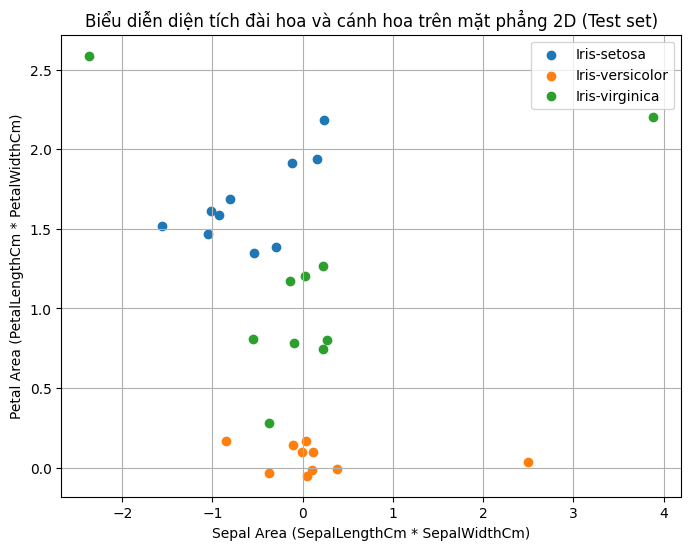

In [ ]:
# Biểu diễn bộ test lên mặt phẳng 2D với đặc trưng diện tích như trên
import pandas as pd
import matplotlib.pyplot as plt

test_df = pd.read_csv('iris_test.csv')

# Tạo đặc trưng diện tích cho test
test_df['SepalArea'] = test_df['SepalLengthCm'] * test_df['SepalWidthCm']
test_df['PetalArea'] = test_df['PetalLengthCm'] * test_df['PetalWidthCm']

# Lưu ra file nếu cần
test_df.to_csv('iris_test_area2d.csv', index=False)

# Biểu diễn lên mặt phẳng 2D
plt.figure(figsize=(8,6))
for species in test_df['Species'].unique():
    subset = test_df[test_df['Species'] == species]
    plt.scatter(subset['SepalArea'], subset['PetalArea'], label=species)

plt.xlabel('Sepal Area (SepalLengthCm * SepalWidthCm)')
plt.ylabel('Petal Area (PetalLengthCm * PetalWidthCm)')
plt.title('Biểu diễn diện tích đài hoa và cánh hoa trên mặt phẳng 2D (Test set)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# So khớp mẫu (template matching) giữa test và train trên không gian 2D diện tích (SepalArea, PetalArea)
import numpy as np
import pandas as pd

# Đọc dữ liệu train và test đã chuyển thành 2D diện tích
train_df = pd.read_csv('iris_train_area2d.csv')
test_df = pd.read_csv('iris_test_area2d.csv')

X_train = train_df[['SepalArea', 'PetalArea']].values
y_train = train_df['Species'].values
X_test = test_df[['SepalArea', 'PetalArea']].values
y_test = test_df['Species'].values

pred_labels = []
min_dists = []

for x in X_test:
    dists = [np.sqrt(np.sum((x - x_train)**2)) for x_train in X_train]
    nearest_idx = np.argmin(dists)
    pred_labels.append(y_train[nearest_idx])
    min_dists.append(dists[nearest_idx])

# Kết quả dự đoán
df_result = test_df.copy()
df_result['Predicted_Species'] = pred_labels
df_result['Euclidean_Dist'] = min_dists

print(df_result[['SepalArea', 'PetalArea', 'Species', 'Predicted_Species', 'Euclidean_Dist']])

# Đánh giá độ chính xác
accuracy = np.mean(df_result['Predicted_Species'] == y_test)
print(f'Độ chính xác trên test set: {accuracy*100:.2f}%')

    SepalArea  PetalArea          Species Predicted_Species  Euclidean_Dist
0   -0.803007   1.686396      Iris-setosa       Iris-setosa        0.001495
1   -1.012175   1.611733      Iris-setosa       Iris-setosa        0.058432
2    0.157969   1.937401      Iris-setosa       Iris-setosa        0.118348
3    0.233674   2.183819      Iris-setosa    Iris-virginica        0.081374
4   -0.114940   1.910386      Iris-setosa       Iris-setosa        0.055534
5   -0.540939   1.348667      Iris-setosa       Iris-setosa        0.110846
6   -1.051616   1.468088      Iris-setosa       Iris-setosa        0.089504
7   -0.929555   1.584718      Iris-setosa       Iris-setosa        0.115402
8   -0.299807   1.383157      Iris-setosa    Iris-virginica        0.096753
9   -1.554815   1.517531      Iris-setosa       Iris-setosa        0.094201
10   2.492277   0.038420  Iris-versicolor   Iris-versicolor        0.709998
11  -0.008580   0.099426  Iris-versicolor   Iris-versicolor        0.040713
12  -0.37513

In [ ]:
import numpy as np
import pandas as pd

# Đọc dữ liệu train và test đã chuyển thành 2D diện tích
train_df = pd.read_csv('iris_train_area2d.csv')
test_df = pd.read_csv('iris_test_area2d.csv')

X_train = train_df[['SepalArea', 'PetalArea']].values
y_train = train_df['Species'].values
X_test = test_df[['SepalArea', 'PetalArea']].values
y_test = test_df['Species'].values

pred_labels = []
min_dists = []

for x in X_test:
    # 🔹 Khoảng cách Manhattan: tổng giá trị tuyệt đối giữa các tọa độ
    dists = [np.sum(np.abs(x - x_train)) for x_train in X_train]
    nearest_idx = np.argmin(dists)
    pred_labels.append(y_train[nearest_idx])
    min_dists.append(dists[nearest_idx])

# Kết quả dự đoán
df_result = test_df.copy()
df_result['Predicted_Species'] = pred_labels
df_result['Manhattan_Dist'] = min_dists

print(df_result[['SepalArea', 'PetalArea', 'Species', 'Predicted_Species', 'Manhattan_Dist']])

# Đánh giá độ chính xác
accuracy = np.mean(df_result['Predicted_Species'] == y_test)
print(f'Độ chính xác trên test set (Manhattan): {accuracy*100:.2f}%')


    SepalArea  PetalArea          Species Predicted_Species  Manhattan_Dist
0   -0.803007   1.686396      Iris-setosa       Iris-setosa        0.001495
1   -1.012175   1.611733      Iris-setosa       Iris-setosa        0.082604
2    0.157969   1.937401      Iris-setosa       Iris-setosa        0.162241
3    0.233674   2.183819      Iris-setosa    Iris-virginica        0.084502
4   -0.114940   1.910386      Iris-setosa       Iris-setosa        0.061855
5   -0.540939   1.348667      Iris-setosa       Iris-setosa        0.110846
6   -1.051616   1.468088      Iris-setosa       Iris-setosa        0.119786
7   -0.929555   1.584718      Iris-setosa       Iris-setosa        0.156260
8   -0.299807   1.383157      Iris-setosa    Iris-virginica        0.101325
9   -1.554815   1.517531      Iris-setosa       Iris-setosa        0.094201
10   2.492277   0.038420  Iris-versicolor   Iris-versicolor        0.739083
11  -0.008580   0.099426  Iris-versicolor   Iris-versicolor        0.057495
12  -0.37513